| <h1> Assignment 10.2 </h1> | <h1> ARIMA Model </h1> |
|--- | --- |
Name: Buan, Danilo Jr. G. <br>
Course and Section: CPE019/CPE32S3 <br>
Date Submitted: 05/01/24 <br>
Instructor: Engr. Roman M. Richard
Date Performed: 05/04/24


For this assignment, do the following:

- Load time series data: data.csv
- Visualize the time series
- Fit an ARIMA Model (baseline model order = (1,1,1))
- Improve the ARIMA Model
- Print the model summary
- Make a forecast (steps=10)
- Plot the forecast
- Perform a grid search

Supplementary Activity: Do the same for this dataset - dataset_temperature.csv

Loading necessary libraries

In [1]:
%matplotlib inline

import sys
import statsmodels as s
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/user/Documents/ARIMA MODEL/data.csv", index_col = 'Month', parse_dates = True)
data.head(5)

,CO2 (ppm)
Month,
1965-01-01,319.32
1965-02-01,320.36
1965-03-01,320.82
1965-04-01,322.06
1965-05-01,322.17


Visualizing the time series

<Axes: xlabel='Month'>

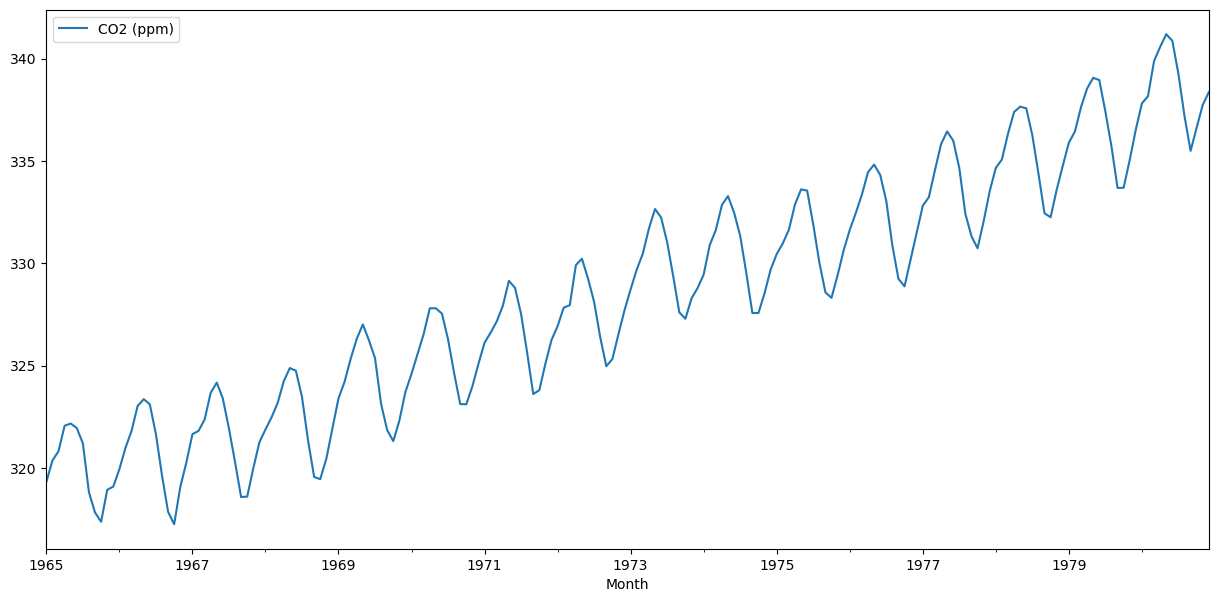

In [9]:
data.plot(figsize=(15,7))

Fitting an ARIMA Model (baseline model order = (1,1,1))

In [10]:
from statsmodels.tsa.arima.model import ARIMA

baseline_model = ARIMA(data, order=(1,1,1))
baseline_model_fit = baseline_model.fit()

D:\ANACINDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\ANACINDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\ANACINDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Improving the ARIMA Model

In [11]:
from statsmodels.tsa.arima.model import ARIMA

improved_model = ARIMA(data, order=(1,2,2))
improved_model_fit = improved_model.fit()

D:\ANACINDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\ANACINDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\ANACINDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Printing the model summary

In [12]:
print(baseline_model_fit.summary())
print(improved_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -225.819
Date:                Thu, 02 May 2024   AIC                            457.638
Time:                        20:45:16   BIC                            467.395
Sample:                    01-01-1965   HQIC                           461.590
                         - 12-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5590      0.087      6.441      0.000       0.389       0.729
ma.L1          0.3307      0.092      3.613      0.000       0.151       0.510
sigma2         0.6202      0.071      8.704      0.0

Making a forecast = 10 with the baseline model

In [21]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Splitting into train and test sets
train_size = int(len(data) * 0.75)
train_data, test_data = data[0:train_size], data[train_size:]

start = len(train_data)
end=len(train_data)+len(test_data)-1
baseline_model = ARIMA(train_data, order = (1,1,1))
results = baseline_model.fit()
predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
forecast = results.predict(len(data), len(data)+10, typ = 'levels')

D:\ANACINDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\ANACINDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\ANACINDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\ANACINDA\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
D:\ANACINDA\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown ke

In [22]:
print("Forecast (steps = 10)")
print(forecast)

Forecast (steps = 10)
1981-01-01    333.27014
1981-02-01    333.27014
1981-03-01    333.27014
1981-04-01    333.27014
1981-05-01    333.27014
1981-06-01    333.27014
1981-07-01    333.27014
1981-08-01    333.27014
1981-09-01    333.27014
1981-10-01    333.27014
1981-11-01    333.27014
Freq: MS, Name: predicted_mean, dtype: float64


In [23]:
print("MSE: ", mean_squared_error(test_data, predictions))
print("RMSE: ", sqrt(mean_squared_error(test_data, predictions)))

MSE:  13.928217944129415
RMSE:  3.7320527788509925


Making a forecast = 1- with the improved model

In [19]:
# Splitting into train and test sets
train_size = int(len(data) * 0.75)
train_data, test_data = data[0:train_size], data[train_size:]

start = len(train_data)
end=len(train_data)+len(test_data)-1
improved_model = ARIMA(train_data, order = (1,2,2))
improved_results = improved_model.fit()
improved_predictions = improved_results.predict(start=start, end=end, dynamic=False, type='levels')
improved_forecast = improved_results.predict(len(data), len(data)+10, typ = 'levels')

D:\ANACINDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\ANACINDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\ANACINDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\ANACINDA\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
D:\ANACINDA\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown ke

In [20]:
print("Forecast (steps = 10)")
print(improved_forecast)

Forecast (steps = 10)
1981-01-01    338.581935
1981-02-01    338.692548
1981-03-01    338.803161
1981-04-01    338.913774
1981-05-01    339.024387
1981-06-01    339.135000
1981-07-01    339.245613
1981-08-01    339.356226
1981-09-01    339.466839
1981-10-01    339.577452
1981-11-01    339.688065
Freq: MS, Name: predicted_mean, dtype: float64


In [24]:
print("MSE: ", mean_squared_error(test_data, improved_predictions))
print("RMSE: ", sqrt(mean_squared_error(test_data, improved_predictions)))

MSE:  4.099117395756948
RMSE:  2.024627717818006


Plotting the forecast for the baseline model

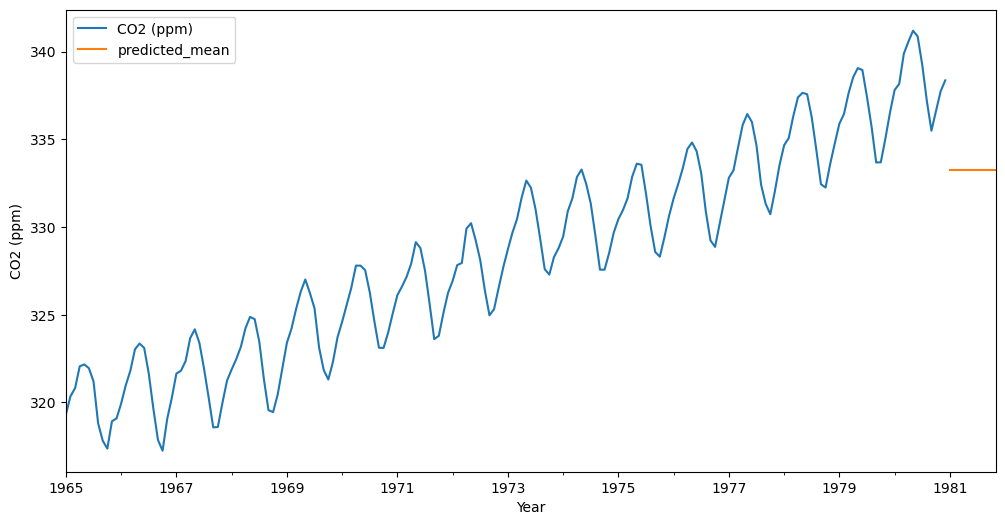

In [25]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

ylabel='CO2 (ppm)'
xlabel='Year'

ax = data.plot(legend=True,figsize=(12,6))
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

Plotting the forecast for the improved model

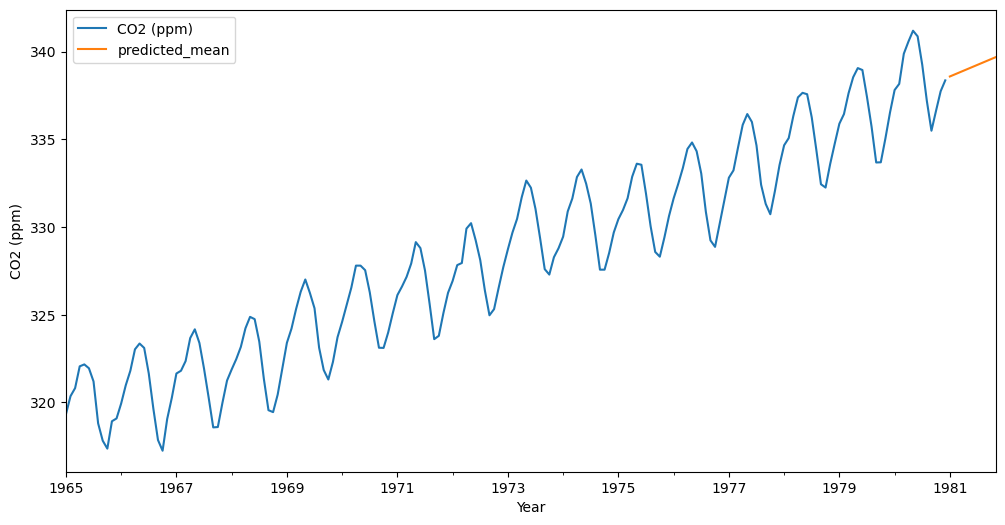

In [26]:
ylabel='CO2 (ppm)'
xlabel='Year'

ax = data.plot(legend=True,figsize=(12,6))
improved_forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

Performing a grid search

In [27]:
def evaluate_arima_model(dataset, arima_order):
  train_size = int(len(data) * 0.75)
  train_data, test_data = data[0:train_size], data[train_size:]

  start = len(train_data)
  end=len(train_data)+len(test_data)-1

  model = ARIMA(train_data, order = arima_order)
  results = model.fit()
  forecast = results.predict(len(data), len(data)+10, typ = 'levels')
  predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
  mse = mean_squared_error(test_data, predictions)
  return mse

def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(data, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA=%s MSE=%.3f' % (best_cfg, best_score))
    
import warnings
p_values = range(0,11)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(data.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=107.199
ARIMA(0, 0, 1) MSE=106.494
ARIMA(0, 0, 2) MSE=106.042
ARIMA(0, 0, 3) MSE=105.846
ARIMA(0, 1, 0) MSE=26.634
ARIMA(0, 1, 1) MSE=23.951
ARIMA(0, 1, 2) MSE=20.025
ARIMA(0, 1, 3) MSE=18.380
ARIMA(0, 2, 0) MSE=1059.451
ARIMA(0, 2, 1) MSE=942.369
ARIMA(0, 2, 2) MSE=998.307
ARIMA(0, 2, 3) MSE=6.025
ARIMA(0, 3, 0) MSE=1432.028
ARIMA(0, 3, 1) MSE=1128.383
ARIMA(0, 3, 2) MSE=946.044
ARIMA(0, 3, 3) MSE=1022.947
ARIMA(1, 0, 0) MSE=62.368
ARIMA(1, 0, 1) MSE=72.465
ARIMA(1, 0, 2) MSE=81.394
ARIMA(1, 0, 3) MSE=91.863
ARIMA(1, 1, 0) MSE=8.619
ARIMA(1, 1, 1) MSE=13.928
ARIMA(1, 1, 2) MSE=14.918
ARIMA(1, 1, 3) MSE=18.170
ARIMA(1, 2, 0) MSE=1065.125
ARIMA(1, 2, 1) MSE=1008.357
ARIMA(1, 2, 2) MSE=4.099
ARIMA(1, 2, 3) MSE=4.275
ARIMA(1, 3, 0) MSE=75819.292
ARIMA(1, 3, 1) MSE=1088.486
ARIMA(1, 3, 2) MSE=1026.824
ARIMA(1, 3, 3) MSE=1016.868
ARIMA(2, 0, 0) MSE=97.612
ARIMA(2, 0, 1) MSE=95.559
ARIMA(2, 0, 2) MSE=94.688
ARIMA(2, 0, 3) MSE=36.898
ARIMA(2, 1, 0) MSE=23.998
ARIMA(2, 1, 1)

Observation: The output suggests that the best ARIMA model is (9, 2, 0). This means it effectively captures the data's seasonal trend with a seasonal difference of 2, along with autoregression and moving average parameters of 9 and 0 respectively.

In [28]:
# Splitting into train and test sets
train_size = int(len(data) * 0.75)
train_data, test_data = data[0:train_size], data[train_size:]

start = len(train_data)
end=len(train_data)+len(test_data)-1
best_model = ARIMA(train_data, order = (9,2,0))
best_results = best_model.fit()
best_predictions = best_results.predict(start=start, end=end, dynamic=False, type='levels')
best_forecast = best_results.predict(len(data), len(data)+10, typ = 'levels')

In [30]:
print("Forecast (steps = 10)")
print(best_forecast)

Forecast (steps = 10)
1981-01-01    338.829606
1981-02-01    339.410272
1981-03-01    339.846662
1981-04-01    339.951253
1981-05-01    339.624655
1981-06-01    338.996992
1981-07-01    338.388088
1981-08-01    338.098031
1981-09-01    338.219457
1981-10-01    338.635457
1981-11-01    339.168957
Freq: MS, Name: predicted_mean, dtype: float64


In [32]:
print("MSE: ", mean_squared_error(test_data, best_predictions))
print("RMSE: ", sqrt(mean_squared_error(test_data, best_predictions)))

MSE:  1.1497611648795527
RMSE:  1.072269166244909


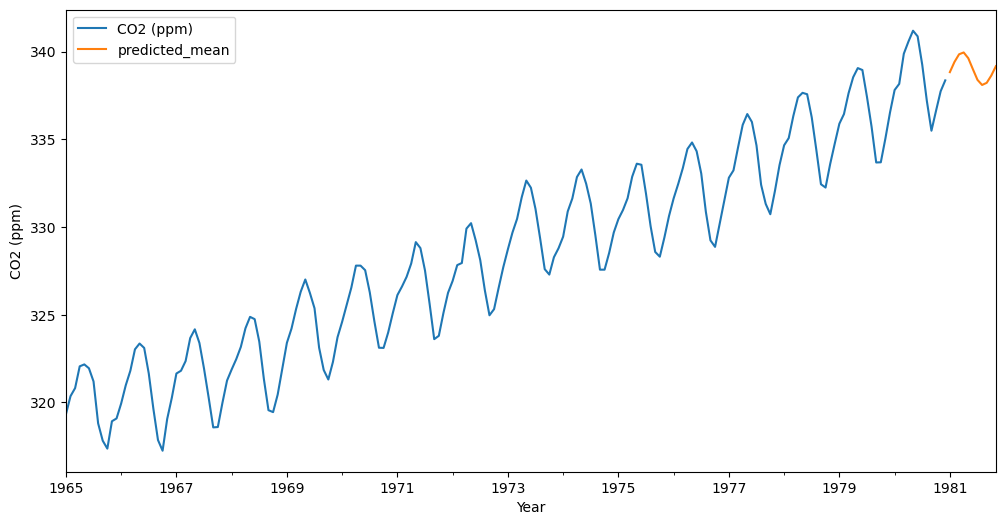

In [33]:
ylabel='CO2 (ppm)'
xlabel='Year'

ax = data.plot(legend=True,figsize=(12,6))
best_forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

Observation: As seen on the outputs above, the optimal ARIMA Model of (9, 2, 0) displays a much better results, characterized by the lowest MSE and RMSE of 1 - 1.15. Additionally, the graph depicts a more favorable plot, showcasing a closer alignment between the predicted values and the actual data points, indicating a better fit of the model to the observed data distribution.

Supplementary Activity

In [195]:
supple = pd.read_csv("C:/Users/user/Documents/ARIMA MODEL/dataset_temperature.csv", index_col = 'Month', parse_dates = True)
supple.head(5)

,Mean monthly temperature
Month,
1907-01,33.3
1907-02,46
1907-03,43
1907-04,55
1907-05,51.8


In [196]:
specific_row = supple.iloc[793]
print(specific_row)

Mean monthly temperature     1907 ? 1972
Name: Mean monthly temperature, dtype: object


In [197]:
clean_supple = supple.drop(specific_row.name)

In [198]:
clean_supple.dropna(inplace = True)

In [199]:
clean_supple.head(900)

,Mean monthly temperature
Month,
1907-01,33.3
1907-02,46
1907-03,43
1907-04,55
1907-05,51.8
...,...
1972-08,75.6
1972-09,64.1
1972-10,51.7


In [200]:
clean_supple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 792 entries, 1907-01 to 1972-12
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mean monthly temperature  792 non-null    object
dtypes: object(1)
memory usage: 12.4+ KB


In [201]:
clean_supple['Mean monthly temperature'] = pd.to_numeric(clean_supple['Mean monthly temperature'], errors = 'coerce')

clean_supple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 792 entries, 1907-01 to 1972-12
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Mean monthly temperature  792 non-null    float64
dtypes: float64(1)
memory usage: 12.4+ KB


Observation: Before visualizing the time series, I cleaned the data because I encountered an error indicating that there was no numeric data to plot. Upon investigation, I discovered an erroneous value in the 793rd row of the second column, which I promptly removed. Then, I utilized .info() to examine the DataFrame, and I noticed that the dtype of the relevant column was object. Consequently, I converted it into a numeric type.

<Axes: xlabel='Month'>

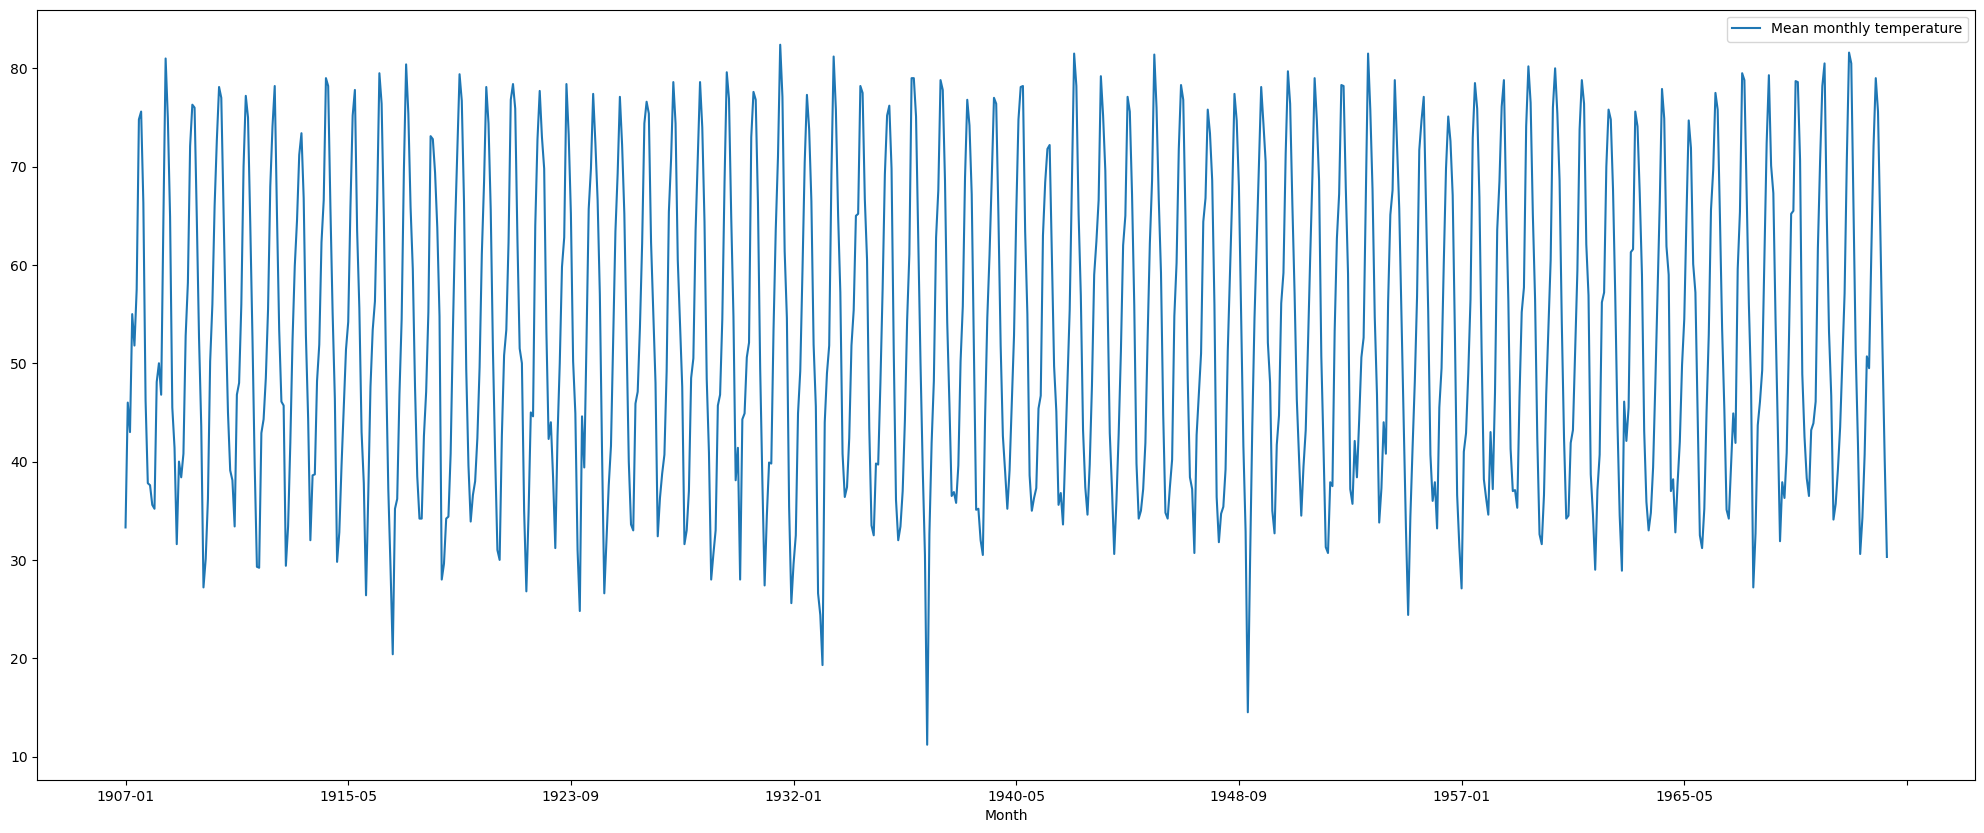

In [202]:
clean_supple.plot(figsize=(25,10))

In [203]:
supple_baseline_model = ARIMA(clean_supple, order=(1,1,1))
supple_baseline_model_fit = supple_baseline_model.fit()

In [204]:
print(supple_baseline_model_fit.summary())

                                  SARIMAX Results                                   
Dep. Variable:     Mean monthly temperature   No. Observations:                  792
Model:                       ARIMA(1, 1, 1)   Log Likelihood               -2773.596
Date:                      Fri, 03 May 2024   AIC                           5553.192
Time:                              00:20:12   BIC                           5567.212
Sample:                          01-01-1907   HQIC                          5558.581
                               - 12-01-1972                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5458      0.060      9.104      0.000       0.428       0.663
ma.L1         -0.0333      0.072     -0.462      0.644      -0.174       0.108
sigm

In [205]:
train_size = int(len(clean_supple) * 0.75)
train_data, test_data = clean_supple[0:train_size], clean_supple[train_size:]

start = len(train_data)
end=len(train_data)+len(test_data)-1
supple_baseline_model = ARIMA(train_data, order = (1,1,1))
supple_baseline_results = supple_baseline_model.fit()
supple_baseline_predictions = supple_baseline_results.predict(start=start, end=end, dynamic=False, type='levels')
supple_baseline_forecast = supple_baseline_results.predict(len(clean_supple), len(clean_supple) + 10, type = 'levels')

In [206]:
print("Forecast (steps = 10)")
print(supple_baseline_forecast)

Forecast (steps = 10)
1973-01-01    80.89335
1973-02-01    80.89335
1973-03-01    80.89335
1973-04-01    80.89335
1973-05-01    80.89335
1973-06-01    80.89335
1973-07-01    80.89335
1973-08-01    80.89335
1973-09-01    80.89335
1973-10-01    80.89335
1973-11-01    80.89335
Freq: MS, Name: predicted_mean, dtype: float64


In [207]:
print("MSE: ", mean_squared_error(test_data, supple_baseline_predictions))
print("RMSE: ", sqrt(mean_squared_error(test_data, supple_baseline_predictions)))

MSE:  967.9598873854789
RMSE:  31.112053731399328


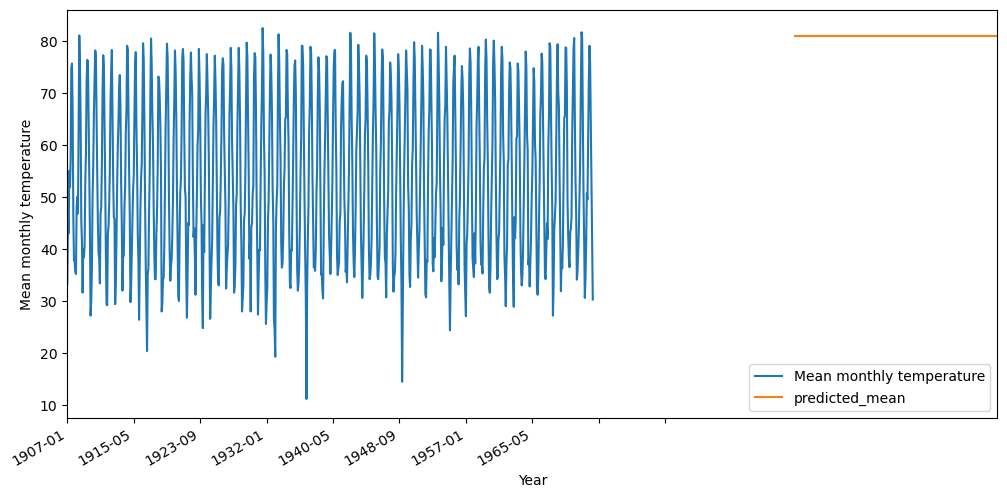

In [208]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

ylabel='Mean monthly temperature'
xlabel='Year'

ax = clean_supple.plot(legend=True,figsize=(12,6))
supple_baseline_forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [190]:
def evaluate_arima_model(dataset, arima_order):
  train_size = int(len(clean_supple) * 0.75)
  train_data, test_data = clean_supple[0:train_size], clean_supple[train_size:]

  start = len(train_data)
  end=len(train_data)+len(test_data)-1

  model = ARIMA(train_data, order = arima_order)
  results = model.fit()
  forecast = results.predict(len(clean_supple), len(clean_supple)+10, typ = 'levels')
  predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
  mse = mean_squared_error(test_data, predictions)
  return mse

def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(clean_supple, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA=%s MSE=%.3f' % (best_cfg, best_score))
    
import warnings
p_values = range(0,11)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(clean_supple.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=244.680
ARIMA(0, 0, 1) MSE=243.522
ARIMA(0, 0, 2) MSE=241.414
ARIMA(0, 0, 3) MSE=240.950
ARIMA(0, 1, 0) MSE=495.038
ARIMA(0, 1, 1) MSE=563.035
ARIMA(0, 1, 2) MSE=762.177
ARIMA(0, 1, 3) MSE=241.417
ARIMA(0, 2, 0) MSE=1244065.976
ARIMA(0, 2, 1) MSE=1228064.280
ARIMA(0, 2, 2) MSE=1375959.213
ARIMA(0, 2, 3) MSE=1226.260
ARIMA(0, 3, 0) MSE=75530369.710
ARIMA(0, 3, 1) MSE=1146539.568
ARIMA(0, 3, 2) MSE=1228541.762
ARIMA(0, 3, 3) MSE=1377367.901
ARIMA(1, 0, 0) MSE=244.502
ARIMA(1, 0, 1) MSE=242.878
ARIMA(1, 0, 2) MSE=242.032
ARIMA(1, 0, 3) MSE=241.498
ARIMA(1, 1, 0) MSE=927.784
ARIMA(1, 1, 1) MSE=967.960
ARIMA(1, 1, 2) MSE=242.927
ARIMA(1, 1, 3) MSE=242.090
ARIMA(1, 2, 0) MSE=1304343.983
ARIMA(1, 2, 1) MSE=1337791.296
ARIMA(1, 2, 2) MSE=1669.956
ARIMA(1, 2, 3) MSE=1745.205
ARIMA(1, 3, 0) MSE=348687768.394
ARIMA(1, 3, 1) MSE=1318955.242
ARIMA(1, 3, 2) MSE=1359039.348
ARIMA(1, 3, 3) MSE=1237604.336
ARIMA(2, 0, 0) MSE=235.314
ARIMA(2, 0, 1) MSE=184.648
ARIMA(2, 0, 2) MSE=16.44

In [209]:
train_size = int(len(clean_supple) * 0.75)
train_data, test_data = clean_supple[0:train_size], clean_supple[train_size:]

start = len(train_data)
end=len(train_data)+len(test_data)-1
supple_optimal_model = ARIMA(train_data, order = (3,0,3))
supple_optimal_results = supple_optimal_model.fit()
supple_optimal_predictions = supple_optimal_results.predict(start=start, end=end, dynamic=False, type='levels')
supple_optimal_forecast = supple_optimal_results.predict(len(clean_supple), len(clean_supple) + 10, type = 'levels')

In [210]:
print("Forecast (steps = 10)")
print(supple_optimal_forecast)

Forecast (steps = 10)
1973-01-01    32.789541
1973-02-01    34.941617
1973-03-01    42.063503
1973-04-01    52.255782
1973-05-01    62.776873
1973-06-01    70.816570
1973-07-01    74.211189
1973-08-01    72.060681
1973-09-01    64.933043
1973-10-01    54.747921
1973-11-01    44.226623
Freq: MS, Name: predicted_mean, dtype: float64


In [211]:
print("MSE: ", mean_squared_error(test_data, supple_optimal_predictions))
print("RMSE: ", sqrt(mean_squared_error(test_data, supple_optimal_predictions)))

MSE:  15.661289650309964
RMSE:  3.9574347310233637


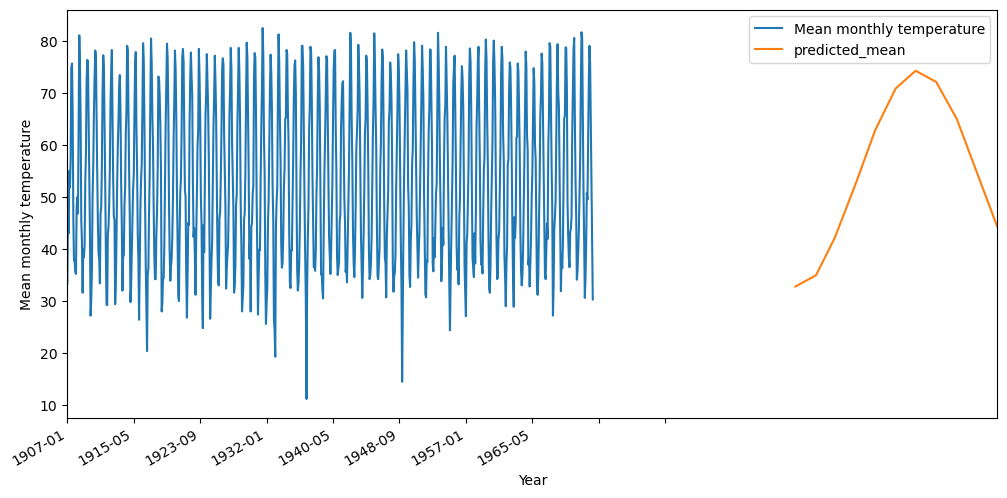

In [212]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

ylabel='Mean monthly temperature'
xlabel='Year'

ax = clean_supple.plot(legend=True,figsize=(12,6))
supple_optimal_forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);